In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the text file with pipe delimiter and handle large file with chunks
def load_data(file_path, delimiter='|'):
    try:
        # Use chunks to handle large files, skip bad lines, and infer header
        chunks = pd.read_csv(file_path, delimiter=delimiter, chunksize=10000, on_bad_lines='skip', encoding='utf-8')
        df = pd.concat(chunk for chunk in chunks)
        print(f"Successfully loaded with delimiter '{delimiter}'")
        return df
    except Exception as e:
        print(f"Error with delimiter '{delimiter}': {e}")
        return None

# Load the data
df = load_data('../data/MachineLearningRating_v3.txt')

if df is not None:
    print("Data sample:")
    print(df.head())
else:
    print("Failed to load data. Check file path or format.")

Successfully loaded with delimiter '|'
Data sample:
   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategor

A. Data Summarization, Structure and Quality

In [4]:
# Descriptive Statistics
if df is not None:
    print(df[['TotalPremium', 'TotalClaims']].describe())
# Check data types
if df is not None:
    print(df.dtypes)
# Check for missing values
if df is not None:
    print(df.isnull().sum())

       TotalPremium   TotalClaims
count  1.000098e+06  1.000098e+06
mean   6.190550e+01  6.486119e+01
std    2.302845e+02  2.384075e+03
min   -7.825768e+02 -1.200241e+04
25%    0.000000e+00  0.000000e+00
50%    2.178333e+00  0.000000e+00
75%    2.192982e+01  0.000000e+00
max    6.528260e+04  3.930921e+05
UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleTyp

B. Univariate Analysis

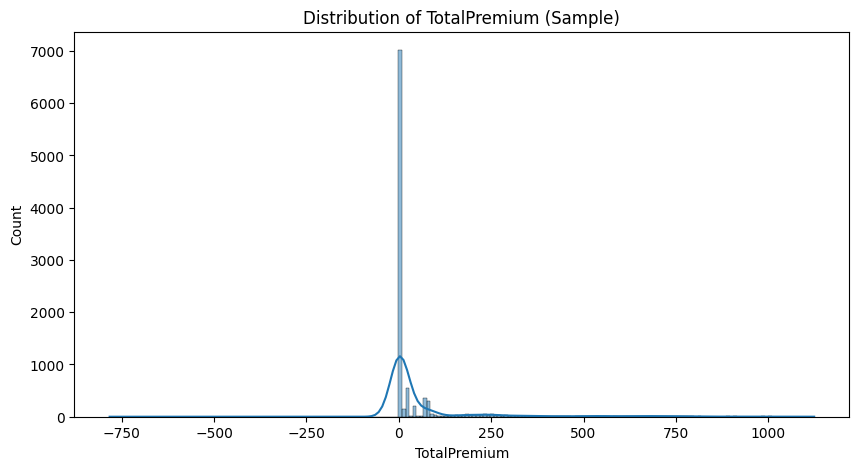

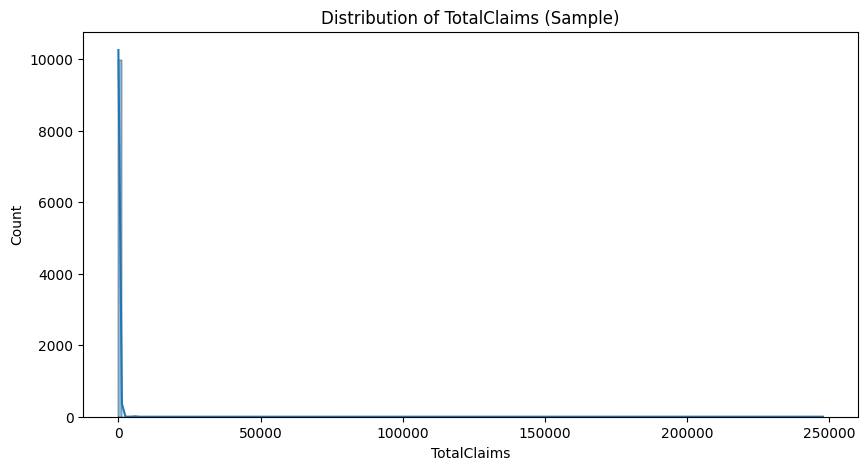

In [7]:
# Histograms (using a sample for speed with large data)
if df is not None:
    sample_df = df.sample(n=10000)  # Sample 10,000 rows
    plt.figure(figsize=(10, 5))
    sns.histplot(sample_df['TotalPremium'].dropna(), kde=True)
    plt.title('Distribution of TotalPremium (Sample)')
    plt.savefig('../notebooks/total_premium_dist.png')
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.histplot(sample_df['TotalClaims'].dropna(), kde=True)
    plt.title('Distribution of TotalClaims (Sample)')
    plt.savefig('../notebooks/total_claims_dist.png')
    plt.show()

C. Bivariate Analysis

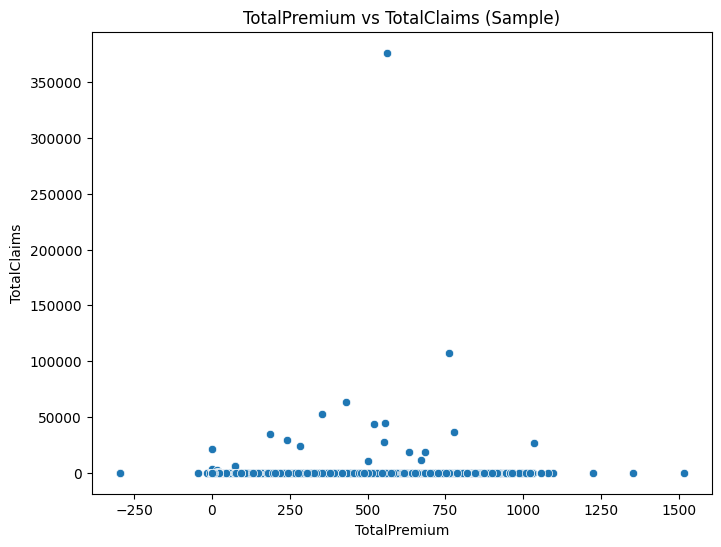

In [9]:
# Scatter plot (using a sample)
if df is not None:
    sample_df = df.sample(n=10000)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='TotalPremium', y='TotalClaims', data=sample_df.dropna(subset=['TotalPremium', 'TotalClaims']))
    plt.title('TotalPremium vs TotalClaims (Sample)')
    plt.savefig('../notebooks/premium_vs_claims.png')
    plt.show()